In [0]:
import pandas as pd
import numpy as np 
from keras.models import Model
from keras.layers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
df_ = pd.read_csv("drive/My Drive/knight/Data/train.csv")

In [0]:
df_.head(10)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


In [0]:
df_feature = df_[['country'  , 'review_description','province' , 'winery' , 'variety']]

In [0]:
grp = df_feature.groupby(by =['variety'] )


In [0]:
rows_with_nan = []
for index, row in df_feature.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [0]:
len(rows_with_nan)

35

In [0]:
# removing nan values with <UNK> token
for i in rows_with_nan:
  df_feature.iloc[i,3] = "<UNK>"
  df_feature.iloc[i,2] = "<UNK>"
  df_feature.iloc[i,4] = "<UNK>"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid d

In [0]:
for name,group in (grp):
   print (name)
   print (group.country.unique())
   print (group.country.nunique())
   print("####")

<UNK>
[nan]
0
####
Bordeaux-style Red Blend
['France' 'US' 'Turkey' 'New Zealand' 'Argentina' 'South Africa' 'Spain'
 'Moldova' 'Chile' 'Israel' 'Slovenia' 'Croatia' 'Australia' 'Brazil'
 'Hungary' 'Canada' 'Austria' 'Italy' 'Mexico' 'Portugal' 'Bulgaria']
21
####
Bordeaux-style White Blend
['France' 'US' 'Argentina' 'South Africa']
4
####
Cabernet Franc
['US' 'Argentina' 'Chile' 'France' 'Canada' 'South Africa' 'Israel'
 'Italy' 'Mexico' 'Bulgaria' 'Brazil' 'Spain' 'Hungary' 'Uruguay']
14
####
Cabernet Sauvignon
['Argentina' 'US' 'Chile' 'Israel' 'Australia' 'Brazil' 'Spain'
 'South Africa' 'Italy' 'Romania' 'France' 'Canada' 'Bulgaria' 'Austria'
 'Moldova' 'Portugal' 'Ukraine' 'New Zealand' 'Mexico' 'Greece' 'Turkey'
 'Uruguay']
22
####
Champagne Blend
['France' 'US' 'Italy' 'Argentina' 'Australia' 'Spain' 'Brazil'
 'New Zealand' 'South Africa' 'Chile' 'Austria' 'Moldova']
12
####
Chardonnay
['Australia' 'New Zealand' 'Chile' 'France' 'US' 'England' 'Argentina'
 'Spain' 'Italy' 'Sout

clearly a single variety of wine is not indigeneous to a country , they are produced in more than one country 

**DEEP LEARNING MODEL**

In [0]:
from keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')
nltk.download('punkt')
stopW = set(stopwords.words('english'))
from keras.utils import to_categorical
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def processData(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text) # removing preposition
  token = word_tokenize(text)
  token_stop = [w for w in token if w not in stopW]

  return " ".join(token_stop)


In [0]:


df_feature['review_cleaned'] = df_feature['review_description'].apply(lambda x: processData(x)  )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print(df_feature.shape)

(82657, 6)


# **TOKENIZATION AND PADDING**

In [0]:
X_reviews = df_feature['review_cleaned']

In [0]:
tokenize = Tokenizer(num_words=5000)
tokenize.fit_on_texts(list(X_reviews))
tokeized_text = tokenize.texts_to_sequences(list(X_reviews))

In [0]:
vocab=len(tokenize.word_index)+1

In [0]:
maxlen = 50
x_rev = pad_sequences(tokeized_text , maxlen= maxlen)

In [0]:
x_rev.shape

(82657, 50)

**Categorical Data**

In [0]:
from sklearn import preprocessing
import numpy as np

In [0]:
label_win = preprocessing.LabelEncoder() 
label_var = preprocessing.LabelEncoder()
label_pro = preprocessing.LabelEncoder()


In [0]:
label_win.fit(df_feature['winery'])
label_var.fit(df_feature['variety'])
label_pro.fit(df_feature['province'])

LabelEncoder()

In [0]:
df_feature['label_win'] = label_win.transform(df_feature['winery'])
df_feature['label_var'] = label_var.transform(df_feature['variety'])
df_feature['label_pro'] = label_pro.transform(df_feature['province'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
classes = len(label_var.classes_)

In [0]:
y_var = to_categorical(list(df_feature['label_var']))
x_win = to_categorical(list(df_feature['label_win']))
x_pro = to_categorical(list(df_feature['label_pro']))

In [0]:
print(y_var.shape, x_win.shape ,x_pro.shape )

(82657, 29) (82657, 13777) (82657, 359)


#**MODEL PREPARATION**

In [0]:

from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,Flatten,concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
import keras
from keras.layers import BatchNormalization

In [0]:
def rnn(maxlen):
  inp = Input(shape=(maxlen, ))
  embed_size = 512
  x = Embedding(vocab,embed_size , trainable=True)(inp)
  x = Bidirectional(LSTM(100  , return_sequences=True))(x)
  x = Dropout(0.2)(x)
  x = BatchNormalization()(x)
  #x = GlobalMaxPool1D()(x)
  x = Dense(64 ,activation="relu")(x)
  x = Dropout(0.4)(x)
  x = (Flatten())(x)
  x = Dense(64 , activation='relu')(x)
  #x=Activation('relu')
  x = BatchNormalization(axis=-1)(x)
  x = Dropout(0.4)(x)
  #x = Dense(64)

  model = Model(inputs=inp, outputs=x)
  return model

In [0]:
def mlp0(dim ,first_unit = 1024):
  inp = Input(shape=(dim,))
  x = Dense(first_unit ,activation="relu")(inp)
  x = Dropout(0.4)(x)
  x = Dense(512 , activation='relu')(x)
  x = BatchNormalization(axis=-1)(x)
  x = Dropout(0.3)(x)
  x = Dense(128 ,activation='relu')(x)
  x=Dense(64 , activation = 'relu')(x)
  x = BatchNormalization(axis=-1)(x)
  x = Dropout(0.4)(x)

  model = Model(inp,x)

  return model


In [0]:
model_rnn = rnn(maxlen)
model_mlp = mlp0(x_win.shape[1] , 1024)
model_mlp1 = mlp0(x_pro.shape[1] , 512)
combined_inp = concatenate([model_rnn.output,model_mlp1.output,model_mlp.output])
x = Dense(32 , activation='relu')(combined_inp)
x = Dense(classes , activation='softmax')(x)
model = Model(inputs=[model_rnn.input, model_mlp1.input,model_mlp.input], outputs=x)

In [0]:
opt = keras.optimizers.Adam(lr=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt , metrics = ['accuracy'])


batch_size = 64
epochs = 4
his=model.fit([x_rev,x_pro,x_win],y_var, batch_size=batch_size, epochs=epochs, validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 74391 samples, validate on 8266 samples
Epoch 1/4
74391/74391 [==============================] - 181s 2ms/step - loss: 1.3219 - accuracy: 0.6143 - val_loss: 0.7388 - val_accuracy: 0.7735
Epoch 2/4
74391/74391 [==============================] - 178s 2ms/step - loss: 0.7311 - accuracy: 0.7787 - val_loss: 0.6294 - val_accuracy: 0.8069
Epoch 3/4
74391/74391 [==============================] - 176s 2ms/step - loss: 0.5629 - accuracy: 0.8256 - val_loss: 0.6221 - val_accuracy: 0.8119
Epoch 4/4
74391/74391 [==============================] - 176s 2ms/step - loss: 0.4595 - accuracy: 0.8573 - val_loss: 0.6230 - val_accuracy: 0.8178


In [0]:
model.save('drive/My Drive/knight/model_data/model_wine.h5')

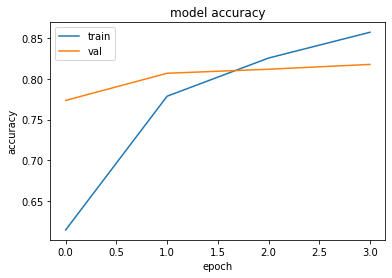

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('drive/My Drive/knight/model_data/accuracy.png')

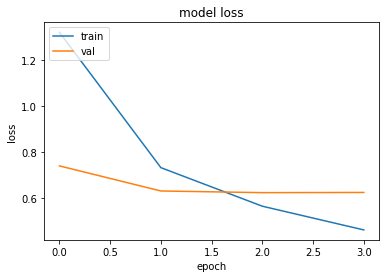

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('drive/My Drive/knight/model_data/loss.png')

#**PICKLE DATA**

In [0]:
import pickle


In [0]:
def picklee(path, file ):
  with open(path,'wb') as f:
    pickle.dump(file,f)

In [0]:
picklee('drive/My Drive/knight/model_data/variety.pkl' , label_var)
picklee('drive/My Drive/knight/model_data/winery.pkl' , label_win)
picklee('drive/My Drive/knight/model_data/province.pkl' , label_pro)

In [0]:
with open('drive/My Drive/knight/model_data/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenize, handle, protocol=pickle.HIGHEST_PROTOCOL)

#**PREDICTION ON TEST DATA**

In [0]:
from keras.models import load_model
df_test = pd.read_csv('drive/My Drive/knight/Data/test.csv')

In [0]:
df_test.shape

(20665, 11)

In [0]:
df_test.isnull().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

**clearly 4 wine type don't have province details so i'll drop them from predicition**

In [0]:
df_prediction = df_test[['review_description' , 'province' ,  'winery']] ## selecting features for prediction

In [0]:

  # for labels of province and winery which are not in training dataset but in test dataset , I'll be replacing such values with unknown token.

df_prediction['winery'] = df_prediction['winery'].map(lambda s: "<UNK>" if s not in label_win.classes_ else s)
df_prediction['province'] = df_prediction['province'].map(lambda s: "<UNK>" if s not in label_pro.classes_ else s)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
x__win = to_categorical(label_win.transform(df_prediction['winery']))
x__pro = to_categorical(label_pro.transform(df_prediction['province']))

In [0]:
df_prediction['review_cleaned'] = df_prediction['review_description'].apply(lambda x: processData(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:

text = tokenize.texts_to_sequences(list(df_prediction['review_cleaned']))
x__rev = pad_sequences(list(text) , maxlen=maxlen)



In [0]:
pre = model.predict([x__rev , x__pro , x__win])

In [0]:
np.argmax(pre[10])

15

In [0]:
prediction = []
for i in pre:
  maxx = np.argmax(i)
  labe = label_var.inverse_transform([maxx])[0]
  prediction.append(labe)

In [0]:
df_prediction['variety_predicted'] = np.array(prediction)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_prediction.drop(labels='review_cleaned' ,axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df_prediction.to_csv('drive/My Drive/prediction.csv')